In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
excel_file = pd.ExcelFile("/content/EastWestAirlines.xlsx")
raw_data = pd.read_excel(excel_file, "data")
pd.set_option('display.max_rows', 10)
raw_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


Checking if there are any null values:

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


Building the Hierarchial clustering model:

In [4]:
# Normalizing the data
data_norm = preprocessing.normalize(raw_data.iloc[:,1:])
data_norm = pd.DataFrame(data_norm)
data_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


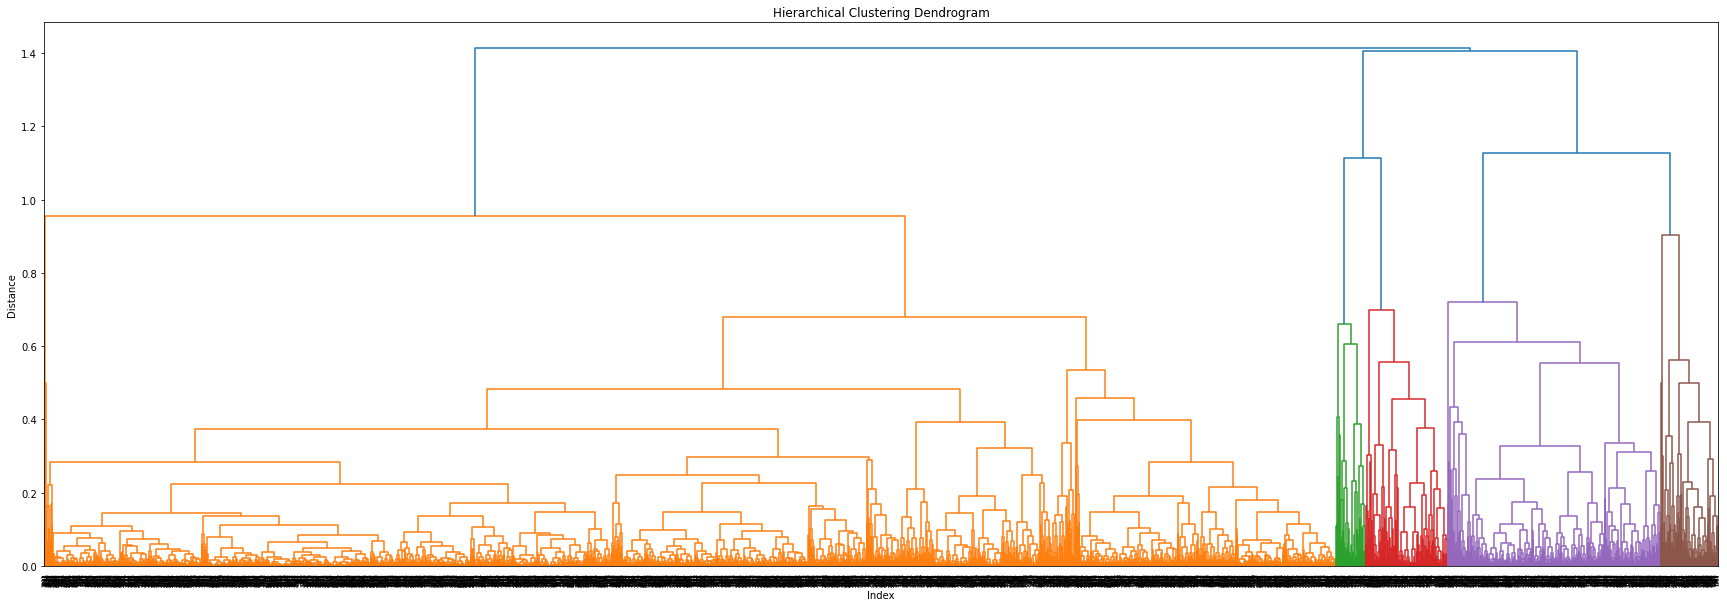

In [5]:
z = linkage(data_norm, method="complete",metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [6]:
h_complete = AgglomerativeClustering(n_clusters=6, linkage='complete',affinity = "euclidean").fit(data_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
raw_data['clust']=cluster_labels 
raw_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [7]:
raw_data.iloc[:,1:].groupby(raw_data.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774,1.000000,0.0
1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444,0.717092,1.0
2,86111.062013,156.252273,1.877922,1.012662,1.002922,13529.853571,11.022078,470.186364,1.405519,4047.757468,0.302273,2.0
3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569,0.182741,3.0
4,1629.914286,0.000000,1.014286,1.000000,1.000000,652.228571,2.571429,42.142857,0.157143,4828.657143,0.171429,4.0
5,7482.000000,4056.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1843.000000,0.000000,5.0


In [8]:
# Standardizing the data:
scaler = preprocessing.StandardScaler()
data_sc = scaler.fit_transform(raw_data.iloc[:,1:12])
data_sc = pd.DataFrame(data_sc)
data_sc

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


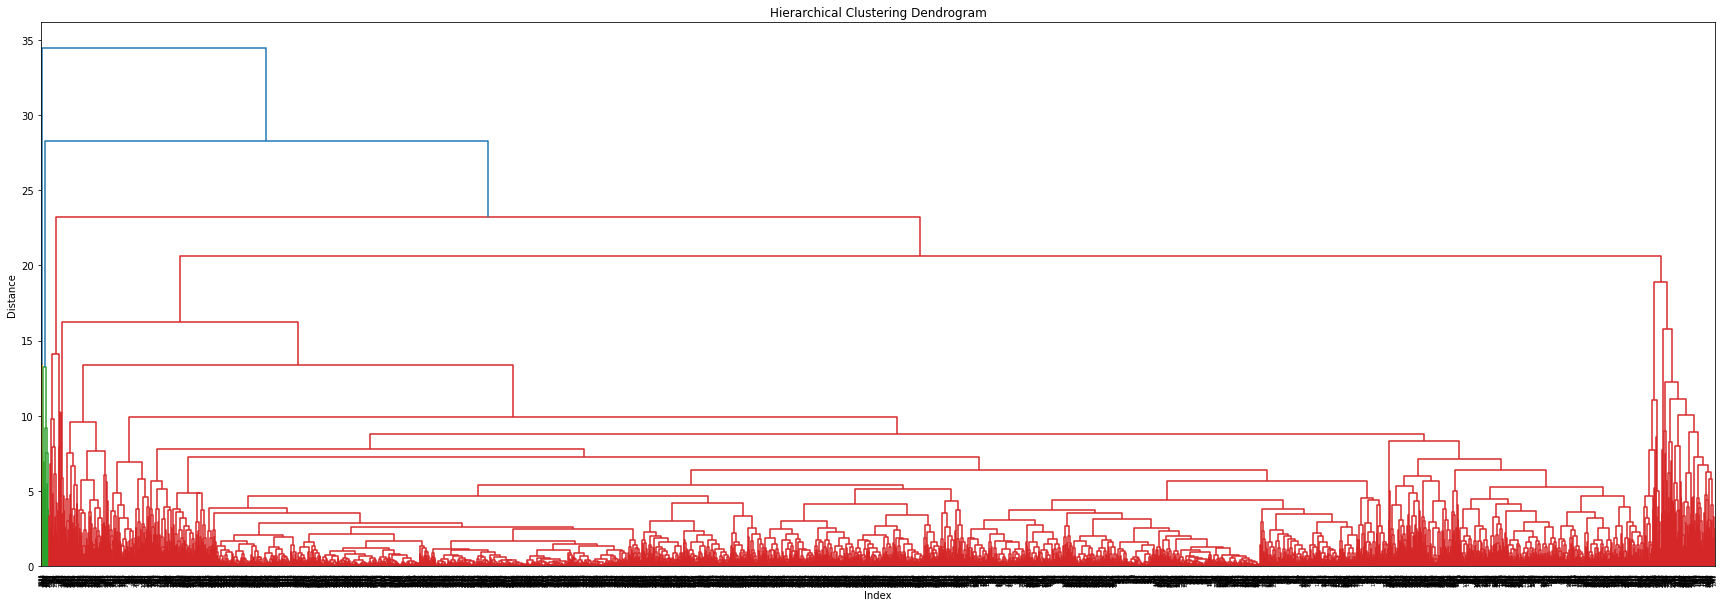

In [9]:
z = linkage(data_sc, method="complete",metric="euclidean")
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [10]:
h_complete = AgglomerativeClustering(n_clusters=6, linkage='complete',affinity = "euclidean").fit(data_sc) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
raw_data['clust2']=cluster_labels 
raw_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clust2
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


In [11]:
raw_data.iloc[:,12:14]

,clust,clust2
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
3994,2,0
3995,2,0
3996,2,0
3997,2,0


Building The KMeans clustering model:

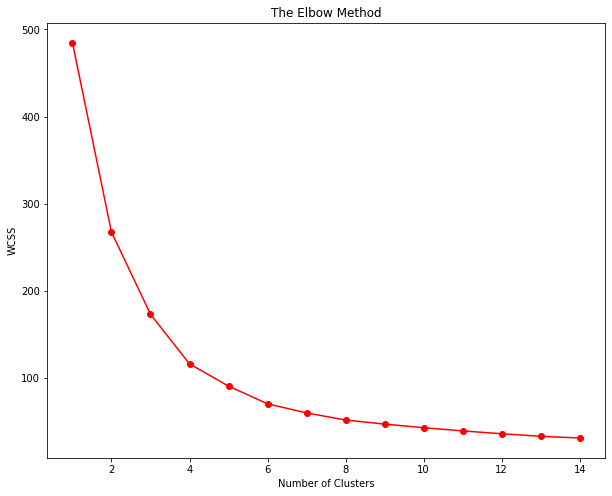

In [12]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 15):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 15), WCSS, "o-r")
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [13]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(data_norm)

In [14]:
predicted = pd.Series(y_kmeans)
raw_data['K_clust'] = predicted 
raw_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clust2,K_clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,0,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0,3


In [15]:
raw_data.iloc[:,1:12].groupby(raw_data["K_clust"]).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
K_clust,,,,,,,,,,,
0,11602.848806,52.100796,1.002653,1.000000,1.000000,958.564987,3.458886,86.254642,0.275862,4909.960212,0.167109
1,46897.281996,126.579176,3.303688,1.034707,1.043384,37790.279826,17.837310,544.494577,1.648590,4087.301518,0.711497
2,82259.766533,142.227455,2.941884,1.024048,1.010020,28651.769539,16.947896,448.965932,1.315631,4051.519038,0.411824
3,97064.693206,181.880042,1.449575,1.007962,1.002123,7656.826964,8.832803,523.628450,1.575372,3940.685775,0.257962
4,18479.345238,81.630952,3.309524,1.017857,1.089286,45626.446429,17.720238,691.982143,1.958333,4421.857143,1.000000
5,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225


Text(0.5, 1.0, 'Clusters using KMeans')

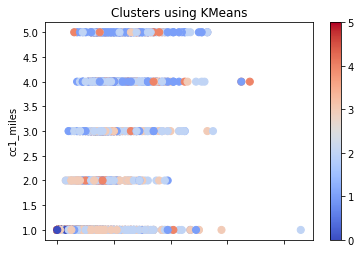

In [16]:
raw_data.plot(x="Bonus_trans",y ="cc1_miles",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

DBSCAN:

In [17]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_sc)
distances, indices = nbrs.kneighbors(data_sc)

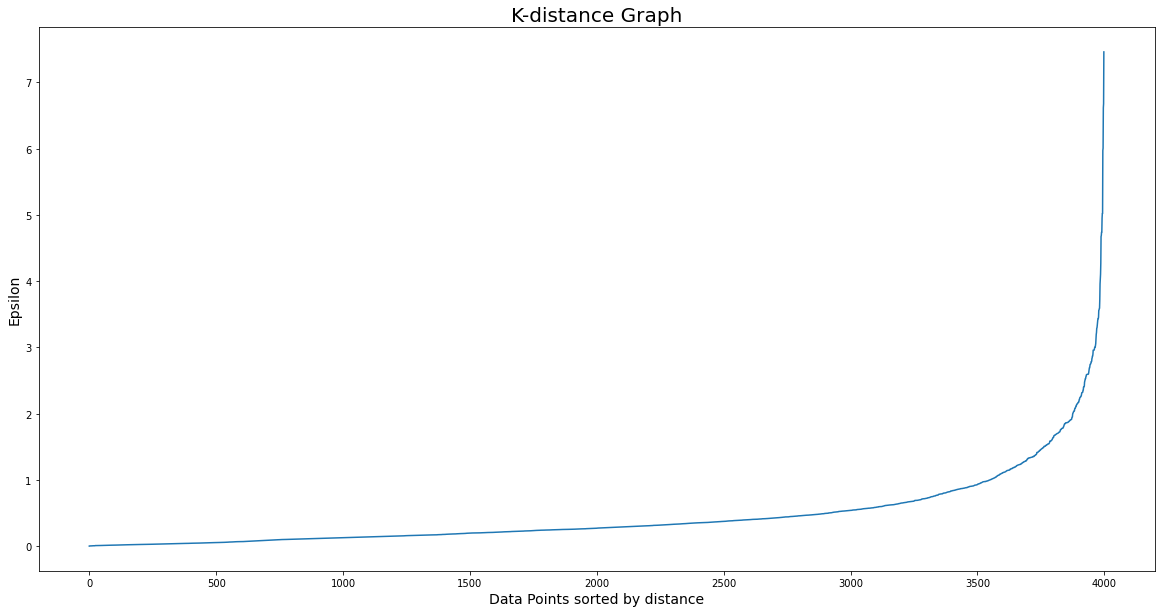

In [18]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Observation: We can see that the elbow is at 2, therefore we can take the epsilon as 2

In [19]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(data_sc)

DBSCAN(eps=2)

In [20]:
dbscan.labels_ 

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
cl=pd.DataFrame(dbscan.labels_,columns=['DBSCAN_cluster']) 

In [22]:
pd.set_option("display.max_rows", 50)
raw_data = pd.concat([raw_data,cl],axis=1) 
raw_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clust2,K_clust,DBSCAN_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,0,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,0,3,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,0,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0,3,0


Text(0.5, 1.0, 'Clusters using DBScan')

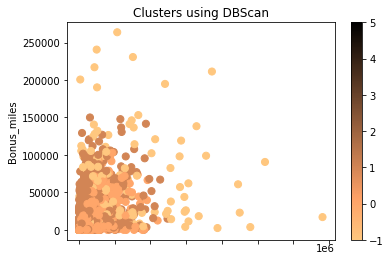

In [23]:
raw_data.plot(x="Balance",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')  